# Wykresiki

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
def load_scifi_table(table_name):
    scifi_path = os.path.join("data", "scifi.stackexchange.com")
    return pd.read_csv(os.path.join(scifi_path, table_name + ".csv"))

In [10]:
Posts = load_scifi_table("Posts")
Tags = load_scifi_table("Tags")

In [11]:
Posts.Tags.str.split('><')

0                                      [<novel, languages>]
1                                       [<vorkosigan-saga>]
2                                     [<total-recall-2070>]
3                                                       NaN
4                                                       NaN
5                             [<star-trek, star-trek-2009>]
6                                              [<the-road>]
7                              [<movie, tv, philip-k-dick>]
8                                                       NaN
9                                                       NaN
10                            [<star-trek, uss-enterprise>]
11                                                      NaN
12                                             [<the-road>]
13                                           [<twin-peaks>]
14                                                      NaN
15                                                      NaN
16        [<star-trek, canon, star-trek-

In [12]:
Tags.head()

,Unnamed: 0,Count,ExcerptPostId,Id,TagName,WikiPostId
0,0,225,1813.0,2,languages,1812.0
1,1,285,2478.0,7,robots,2477.0
2,2,4319,1776.0,10,star-trek,1775.0
3,3,7,3098.0,11,prediction,3097.0
4,4,281,2548.0,12,technology,2547.0


In [13]:
Tags_ordered = Tags.sort_values("Count", ascending=False)
Tags_ordered.head()

,Unnamed: 0,Count,ExcerptPostId,Id,TagName,WikiPostId
47,47,12565,1811.0,130,story-identification,1810.0
168,168,5694,2679.0,533,harry-potter,2678.0
21,21,5305,1970.0,44,star-wars,1969.0
2,2,4319,1776.0,10,star-trek,1775.0
225,225,3352,4872.0,695,marvel,4871.0


<BarContainer object of 10 artists>

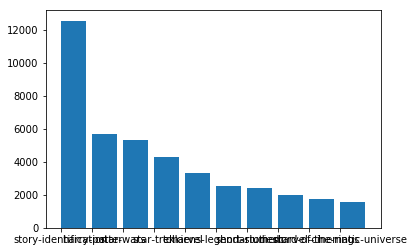

In [14]:
plt.bar(Tags_ordered.TagName[:10], Tags_ordered.Count[:10], align='edge')

https://scifi.stackexchange.com/questions/tagged/story-identification

Tag story-identification oznacza, że pytanie jest o jakiś film/książkę, o którym autor pytania coś pamięta, ale nie potrafi sobie przypomnić tyułu.

In [15]:
Tags_list = Posts.Tags.str.split("><")

In [16]:
Tags_list = Tags_list.map(lambda x: [tag.replace("<", "").replace(">", "") for tag in x], na_action='ignore')
Tags_list.head()

0     [novel, languages]
1      [vorkosigan-saga]
2    [total-recall-2070]
3                    NaN
4                    NaN
Name: Tags, dtype: object

In [17]:
sf_story_index = Posts.loc[:,"Tags"].str.contains("story-identification").rename("story_identification")\
.reset_index().query("story_identification == True").loc[:,"index"]

Tags_story_identification = Tags_list.loc[sf_story_index]

In [18]:
Tags_story_identification

92                                   [story-identification]
95                            [novel, story-identification]
148                       [languages, story-identification]
166          [story-identification, aliens, space, warfare]
233                                  [story-identification]
286                    [story-identification, isaac-asimov]
302       [story-identification, novel, technology, spac...
377                 [story-identification, generation-ship]
379                    [story-identification, ray-bradbury]
487       [story-identification, aliens, short-stories, ...
508                   [story-identification, short-stories]
576       [story-identification, aliens, alien-invasion,...
588                                  [story-identification]
593                           [movie, story-identification]
656           [story-identification, dystopia, young-adult]
693                           [story-identification, novel]
739                [story-identification

In [19]:
Posts.loc[148,].Body

"<p>I remember reading what I believe is a short story about a brother and sister who somehow come into possession of some toys which turn out to be from aliens. Through playing with them they develop a language their parents can't understand and start to develop mentally far faster than any human.  </p>\n\n<p>Does anyone recognize this story, or remember who wrote it or what it's called?  </p>\n"

Chcemy sprawdzić ile pytań o story identification jest o film a ile o książkę.

In [20]:
reading = {"book", "novel"}
movies = {"movie", "tv", "video"}

In [21]:
is_reading = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in reading), na_action='ignore')
is_movies = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in movies), na_action='ignore')

In [22]:
is_reading.sum()

2521

In [23]:
is_movies.sum()

1406

<BarContainer object of 2 artists>

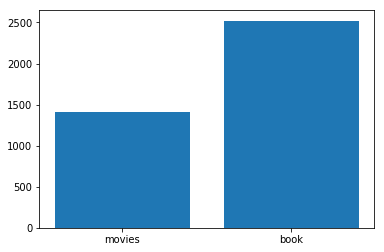

In [24]:
plt.bar(["movies", "book"], [is_movies.sum(), is_reading.sum()])

Dorysujemy na czerwono 

In [25]:
len(sf_story_index)/len(Posts)

0.08126426894495502

In [26]:
(is_reading.sum() + is_movies.sum()) / len(sf_story_index)

0.3125348189415042

Okazuje się, że pominęliśmy większość postów ze story-identification. Żeby osiągnąć bardziej wiarygodne wyniki przydałoby się przeglądać tytuły postów, albo nawet ich treść.

In [27]:
is_reading = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in reading), na_action='ignore')
is_movies = Posts.loc[sf_story_index, "Tags"].map(lambda x: any(tag in x for tag in movies), na_action='ignore')

In [28]:
story_Posts = Posts.loc[sf_story_index]

In [29]:
# Story Identification questions with title contatining reading words
reading_title_story = story_Posts.loc[story_Posts.Title.map(lambda x: any(tag in x for tag in reading))]

# Story Identification questions with title contatining movies words
movies_title_story = story_Posts.loc[story_Posts.Title.map(lambda x: any(tag in x for tag in movies))]

In [30]:
len(reading_title_story), len(movies_title_story)

(2922, 1006)

In [31]:
# Story Identification questions with Body contatining reading words
reading_body_story = story_Posts.loc[story_Posts.Body.map(lambda x: any(tag in x for tag in reading))]

# Story Identification questions with Body contatining movies words
movies_body_story = story_Posts.loc[story_Posts.Body.map(lambda x: any(tag in x for tag in movies))]

In [32]:
len(reading_body_story), len(movies_body_story)

(6037, 1765)

Mamy już pewność, że pytania o ksiązki są częściej zadawane (TODO: można zastanowić się czy słowa które napisaliśmy sa wystarczająco wyczerpujące). Teraz zastanówmy się na ile procent użytkownicy znajdują odpowiedzi w zależności od tego czy pytają o książki czy o filmy.

In [33]:
total_reading_len = len(reading_title_story)
answered_reading_len = len(reading_title_story[reading_title_story.AcceptedAnswerId.notnull()])

In [34]:
total_movies_len = len(movies_title_story)
answered_movies_len = len(movies_title_story[movies_title_story.AcceptedAnswerId.notnull()])

Wykres słupkowy z zaznaczoną liczbą odpowiedzianych pytań.

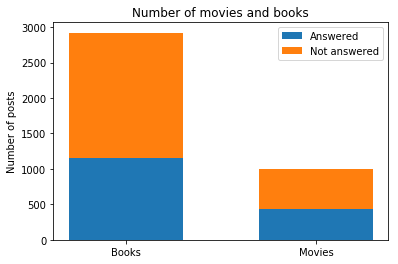

In [35]:
N = 2
total = [total_reading_len, total_movies_len]
answered = [answered_reading_len, answered_movies_len]
not_answered = [t - a for (t,a) in zip(total, answered)]

ind = [0, 0.25]    # the x locations for the groups
width = 0.15       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, answered, width)
p2 = plt.bar(ind, not_answered, width,
             bottom=answered)

plt.ylabel('Number of posts')
plt.title('Number of movies and books')
plt.xticks(ind, ('Books', 'Movies'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Answered', 'Not answered'))

plt.show() # TODO: dodac procenty w kolumnach

In [36]:
len(Posts)

154619

In [37]:
# warto poeksplorowac jeszcze - jakies ciekawe wnioski

In [38]:
# Zobaczymy ile lajków 

In [39]:
Posts.head()

,Unnamed: 0,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,0,NaN,8.0,"<p>I've got <a href=""http://rads.stackoverflow...",2011-01-20T16:28:59.467,6,2011-01-11T20:54:27.723,2011-01-11T20:45:08.070,3.0,1,...,NaN,100.0,NaN,10.0,NaN,1,16,<novel><languages>,What science fiction novels have well develope...,2281.0
1,1,232.0,1.0,<p>In Lois McMaster Bujold's <em>Barrayar</em>...,NaN,2,NaN,2011-01-11T20:47:13.640,NaN,2,...,NaN,70236.0,NaN,27.0,NaN,1,18,<vorkosigan-saga>,What other celestial bodies are in Barrayar's ...,505.0
2,2,2775.0,1.0,<p>The plot of the TV series Total Recall 2070...,NaN,5,NaN,2011-01-11T20:49:52.980,4.0,3,...,NaN,770.0,NaN,35.0,NaN,1,20,<total-recall-2070>,"Other than Alpha and Delta, were there any oth...",487.0
3,3,NaN,NaN,<p>I guess that depends on your definition of ...,NaN,4,2011-01-11T20:54:27.723,2011-01-11T20:50:49.627,NaN,4,...,NaN,NaN,NaN,31.0,1.0,2,11,NaN,NaN,NaN
4,4,NaN,NaN,<p>I'm not sure of a book specifically that's ...,NaN,1,2011-01-11T20:54:27.723,2011-01-11T20:52:46.753,NaN,5,...,NaN,NaN,NaN,39.0,1.0,2,4,NaN,NaN,NaN


In [45]:
reading_title_story.Score.sum(), movies_title_story.Score.sum(), reading_title_scory

(20743, 6612)

In [46]:
reading_title_story.Score.sum()/len(reading_title_story), movies_title_story.Score.sum()/len(reading_title_story)

(7.098904859685147, 2.2628336755646816)

Okazuje się, że posty z książkami są średnio bardziej lubiane niż posty z pytaniami o tytuł filmu.

In [47]:
Posts.head()

,Unnamed: 0,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,0,NaN,8.0,"<p>I've got <a href=""http://rads.stackoverflow...",2011-01-20T16:28:59.467,6,2011-01-11T20:54:27.723,2011-01-11T20:45:08.070,3.0,1,...,NaN,100.0,NaN,10.0,NaN,1,16,<novel><languages>,What science fiction novels have well develope...,2281.0
1,1,232.0,1.0,<p>In Lois McMaster Bujold's <em>Barrayar</em>...,NaN,2,NaN,2011-01-11T20:47:13.640,NaN,2,...,NaN,70236.0,NaN,27.0,NaN,1,18,<vorkosigan-saga>,What other celestial bodies are in Barrayar's ...,505.0
2,2,2775.0,1.0,<p>The plot of the TV series Total Recall 2070...,NaN,5,NaN,2011-01-11T20:49:52.980,4.0,3,...,NaN,770.0,NaN,35.0,NaN,1,20,<total-recall-2070>,"Other than Alpha and Delta, were there any oth...",487.0
3,3,NaN,NaN,<p>I guess that depends on your definition of ...,NaN,4,2011-01-11T20:54:27.723,2011-01-11T20:50:49.627,NaN,4,...,NaN,NaN,NaN,31.0,1.0,2,11,NaN,NaN,NaN
4,4,NaN,NaN,<p>I'm not sure of a book specifically that's ...,NaN,1,2011-01-11T20:54:27.723,2011-01-11T20:52:46.753,NaN,5,...,NaN,NaN,NaN,39.0,1.0,2,4,NaN,NaN,NaN


In [48]:
np.nan == np.nan

False

## Ile lajków dostają przedstawiciele poszczególnych państw?
Można by to rozszerzyć (podobnie jak każdą inną analizę) na sprawdzenie różnic pomiędzy stackami. Być może hindusi są fatalnie oceniami jeśli chodzi o posty dotyczące programowania, ale w jakiejś innej dziedzinie są dobrzy.

In [100]:
Comments = load_scifi_table("Comments")
Users = load_scifi_table("Users")

Postaramy się wydobyć nazwę państwa z kolumny Location. Zauważamy, że państwa zazwyczaj są na końcu. Czasami jednak na końcu są stany albo ich abbreviation i postaramy się z tym jakoś poradzić.

In [158]:
adres = "https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States"
res = pd.read_html(adres)
states = res[0]
states.columns = states.loc[0]
states = states.iloc[2:,[0,1,5]]
states.columns = ["State_Country", "Abbr", "Population"]
states.head()

,State_Country,Abbr,Population
2,Alabama,AL,4874747
3,Alaska,AK,739795
4,Arizona,AZ,113990
5,Arkansas,AR,53179
6,California,CA,39536653


In [159]:
adres = "https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)"
res = pd.read_html(adres)

countries = res[1]
countries = countries.iloc[1:,[1,0,5]]
countries.columns = ["State_Country", "Abbr", "Population"]
countries.Abbr = np.nan
countries.head()

,State_Country,Abbr,Population
1,World,NaN,7550262101
2,China[a],NaN,1409517397
3,India,NaN,1339180127
4,United States,NaN,324459463
5,Indonesia,NaN,263991379


In [109]:
Users["Country_State"] = [x.split(",") if x is not np.nan else np.nan for x in Users.Location]
Users["Country_State"] = [Users.Country_State.iloc[x][-1] if Users.Country_State.iloc[x] is not np.nan else np.nan
                          for x in np.arange(0,len(Users))]

In [110]:
Users.head()

,Unnamed: 0,AboutMe,AccountId,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,ProfileImageUrl,Reputation,UpVotes,Views,WebsiteUrl,Country_State
0,0,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1.0,2011-01-11T19:19:36.483,Community,15607,-1,2011-01-11T19:19:36.483,on the server farm,NaN,1,22476,0,http://meta.stackexchange.com/,on the server farm
1,1,<p>Developer on the Stack Overflow team. Find...,2.0,2011-01-11T19:50:40.620,Geoff Dalgas,0,2,2017-10-18T04:57:25.120,"Corvallis, OR",https://i.stack.imgur.com/nDllk.png,101,1,53,http://stackoverflow.com,OR
2,2,<p>I am the Architecture Lead for Stack Overfl...,7598.0,2011-01-11T19:55:41.460,Nick Craver,0,3,2018-11-23T01:52:18.210,"Winston-Salem, NC",https://i.stack.imgur.com/nGCYr.jpg?s=128&g=1,101,4,29,https://nickcraver.com/blog/,NC
3,3,"<p>co-founder of <a href=""https://airtable.com...",1998.0,2011-01-11T20:17:01.887,Emmett,0,4,2013-05-06T20:52:29.970,"San Francisco, CA",https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1,101,0,26,http://minesweeperonline.com,CA
4,4,"<p><a href=""http://blog.stackoverflow.com/2010...",29738.0,2011-01-11T20:18:52.493,Kevin Montrose,0,5,2018-07-11T16:01:10.277,"New York, NY, United States",NaN,101,43,28,http://kevinmontrose.com/,United States


Mamy teraz już nazwę państwa albo skrót stanu w kolumnie Country_State. Teraz zajmiemy się ustandaryzowaniem tego, żeby później móc grupować.

In [185]:
states_dict = {abbrev: state_name for abbrev, state_name in zip(states.Abbr, states.State_Country)}
countries_set = {country for country in countries.State_Country}

In [188]:
garbage = set()
n_garbage = 0
def abbrev_to_state(word):
    global n_garbage
    """If word is a country or state name it is left unchagned
    If state abbreviation it is changed to state name
    If anything else it is reported and thrown out"""
    if word is np.nan:
        return np.nan
    stripped_word = word.strip()
    if stripped_word in states_dict:
        return states_dict[stripped_word]
    elif stripped_word in states_dict.values():
        return stripped_word
    elif stripped_word in countries_set:
        return stripped_word
    elif stripped_word.lower() == "usa":
        return "United States"
    else:
        n_garbage += 1
        garbage.add(stripped_word)
        return np.nan

In [189]:
Users["Country_cleaned"] = Users.Country_State.map(lambda word: abbrev_to_state(word))

In [190]:
Users.head()

,Unnamed: 0,AboutMe,AccountId,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,ProfileImageUrl,Reputation,UpVotes,Views,WebsiteUrl,Country_State,Country_cleaned
0,0,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1.0,2011-01-11T19:19:36.483,Community,15607,-1,2011-01-11T19:19:36.483,on the server farm,NaN,1,22476,0,http://meta.stackexchange.com/,on the server farm,NaN
1,1,<p>Developer on the Stack Overflow team. Find...,2.0,2011-01-11T19:50:40.620,Geoff Dalgas,0,2,2017-10-18T04:57:25.120,"Corvallis, OR",https://i.stack.imgur.com/nDllk.png,101,1,53,http://stackoverflow.com,OR,Oregon
2,2,<p>I am the Architecture Lead for Stack Overfl...,7598.0,2011-01-11T19:55:41.460,Nick Craver,0,3,2018-11-23T01:52:18.210,"Winston-Salem, NC",https://i.stack.imgur.com/nGCYr.jpg?s=128&g=1,101,4,29,https://nickcraver.com/blog/,NC,North Carolina
3,3,"<p>co-founder of <a href=""https://airtable.com...",1998.0,2011-01-11T20:17:01.887,Emmett,0,4,2013-05-06T20:52:29.970,"San Francisco, CA",https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1,101,0,26,http://minesweeperonline.com,CA,California
4,4,"<p><a href=""http://blog.stackoverflow.com/2010...",29738.0,2011-01-11T20:18:52.493,Kevin Montrose,0,5,2018-07-11T16:01:10.277,"New York, NY, United States",NaN,101,43,28,http://kevinmontrose.com/,United States,United States


In [191]:
n_garbage

6463

In [192]:
len(garbage)

1893

In [193]:
n_garbage/len(Users) # pomijamy tylko 9 % danych, jest to satyfakcjonujący wynik

0.08052679450279719

In [194]:
len(Users)

80259

In [195]:
"Poland ".strip() == "Poland"

True

In [196]:
Users.head()

,Unnamed: 0,AboutMe,AccountId,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,ProfileImageUrl,Reputation,UpVotes,Views,WebsiteUrl,Country_State,Country_cleaned
0,0,"<p>Hi, I'm not really a person.</p>\n\n<p>I'm ...",-1.0,2011-01-11T19:19:36.483,Community,15607,-1,2011-01-11T19:19:36.483,on the server farm,NaN,1,22476,0,http://meta.stackexchange.com/,on the server farm,NaN
1,1,<p>Developer on the Stack Overflow team. Find...,2.0,2011-01-11T19:50:40.620,Geoff Dalgas,0,2,2017-10-18T04:57:25.120,"Corvallis, OR",https://i.stack.imgur.com/nDllk.png,101,1,53,http://stackoverflow.com,OR,Oregon
2,2,<p>I am the Architecture Lead for Stack Overfl...,7598.0,2011-01-11T19:55:41.460,Nick Craver,0,3,2018-11-23T01:52:18.210,"Winston-Salem, NC",https://i.stack.imgur.com/nGCYr.jpg?s=128&g=1,101,4,29,https://nickcraver.com/blog/,NC,North Carolina
3,3,"<p>co-founder of <a href=""https://airtable.com...",1998.0,2011-01-11T20:17:01.887,Emmett,0,4,2013-05-06T20:52:29.970,"San Francisco, CA",https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1,101,0,26,http://minesweeperonline.com,CA,California
4,4,"<p><a href=""http://blog.stackoverflow.com/2010...",29738.0,2011-01-11T20:18:52.493,Kevin Montrose,0,5,2018-07-11T16:01:10.277,"New York, NY, United States",NaN,101,43,28,http://kevinmontrose.com/,United States,United States


Dochodzimy do wniosku, że nie warto rozróżnicać stanów USA i zmienimy Country_cleaned na United Stated gdy mamy jakiś stan.

In [198]:
def change_to_usa(country_state):
    if country_state in states_dict.values():
        return "United States"
    else:
        return country_state

In [199]:
Users.Country_cleaned = Users.Country_cleaned.map(lambda x: change_to_usa(x))

In [208]:
Users_grouped = Users.groupby("Country_cleaned").size()
Users_grouped = Users_grouped.reset_index()
Users_grouped.columns = ["Country", "Count"]
Users_grouped = Users_grouped.sort_values("Count", ascending=False).reset_index(drop=True)
Users_grouped.head()

,Country,Count
0,United States,8652
1,India,2226
2,United Kingdom,1730
3,Canada,961
4,Germany,958


In [209]:
Users_grouped.Count.sum()

20090

In [212]:
len(Users[Users.Location.isna()])

53706

In [213]:
garbage

{'',
 'Skyrim',
 'Lisbon',
 'The Philippines',
 'In close proximity to bacon',
 'Hindhead',
 'Galactic sector ZZ9 Plural Z Alpha',
 'West Palm Beach',
 'Estado de México',
 'Isengard',
 'Zwitserland',
 'Outer Eastern Rim',
 'The Cosmos',
 'QC',
 'Houston',
 'DFW',
 'Rome',
 'Karnataka',
 'Space Shuttle',
 'Tunisie',
 'tijuana baja california',
 'Proxima Centauri B',
 'NY aka Geekopolis',
 'Deonnetti De Antoni',
 'There is no place like 127.0.0.1',
 'North',
 'Ｈｏｇｗａｒｔｓ',
 'Forgotten Realms',
 "because I don't exist...",
 'Copenhagen',
 '32225',
 'THE INTERNET',
 'Hobbiton',
 'Business',
 'Dont matter',
 'Bristol',
 'so cal',
 'I come from the net..',
 'Paraiba',
 'Abbottabad Pakistan',
 'The Nineteenth Byte',
 '阿尔马乔治亚州美国',
 'Here',
 'IN 46901-4269',
 'Nantes',
 'provo',
 'London',
 'Bangaluru',
 'Beijing',
 'bangalore',
 'Kerbin',
 'Franceland',
 '台灣',
 'Southern California',
 'The Sty',
 'Miami',
 'world',
 'Tokyo',
 '907',
 'York',
 'In or around the Isle of Dreams',
 'Česko',
 'New Y